In [107]:
%pylab inline
import pandas
import json
import seaborn
from matplotlib import colors

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [108]:
v_score = {"happiness": 8.5,
           "positivity": 7.6,
           "contentment": 6.6,
           "centeredness": 5.6,
           "skill in stenography": 5,
           "pessimism": 3.9,
           "doubt": 3.3,
           "gloominess": 3.2,
           "sadness": 2.4}
support = {}
support[10] = {
    10:-2.8335
}
support[40] = {
    10: 10.6623,
    40: -1.9701
}
support[60] = {
    10: 27.5739,
    40: 2.7555,
    60: -1.5960
}
support[90] = {
    10: 70.9595,
    40: 27.9765,
    60: 11.4654,
    90: -0.7981
}

In [109]:
untidy_path = "HITResultsFor3CIS7GGG65OZ8XWB43RAMRA21M8UED.csv"

In [110]:
import csv
with open(untidy_path) as f:
    reader = csv.reader(f)
    untidy_list = [row for row in reader]
untidy_list

[['HitId',
  'HitTitle',
  'Annotation',
  'AssignmentId',
  'WorkerId',
  'Status',
  'AcceptTime',
  'SubmitTime',
  'Answer 1'],
 ['3CIS7GGG65OZ8XWB43RAMRA21M8UED',
  'Psych Experiment. $0.75 for 150s (2.5 minutes).',
  ' ',
  '3Z2R0DQ0JIJTB5L3BMM64SBUA6G2EM',
  'A3CF8ULBSE8MTL',
  'Approved',
  'Mon Apr 04 07:28:17 PDT 2016',
  'Mon Apr 04 07:29:06 PDT 2016',
  '{"slide_index":2,"slides":[{"name":"introduction"},{"name":"training"},{"name":"survey"}],"slide_history":[{"name":"introduction","time":1459780105817},{"name":"training","time":1459780108610},{"name":"survey","time":1459780134511},{"name":"exit","time":1459780145668}],"assignmentId":"3Z2R0DQ0JIJTB5L3BMM64SBUA6G2EM","hitId":"3CIS7GGG65OZ8XWB43RAMRA21M8UED","workerId":"A3CF8ULBSE8MTL","turkSubmitTo":"https://www.mturk.com","previewMode":false,"valence_conditions":["sadness","happiness","doubt"],"valence":"happiness","personal_conditions":["you have","there is","someone has"],"personal":"someone has","chemical":[[60,60],[40,4

In [111]:
json_index = untidy_list[0].index('Answer 1')
json_data = [l[json_index] for l in untidy_list]
list_of_dicts = [json.loads(j) for j in json_data[1:]]

In [112]:
tidy_list = []
for subject in list_of_dicts:

    for t_input in subject["training_input"]:
        c = t_input["c"].split(",")
        cp = int(c[0]); cn = int(c[1])
        if t_input["value"] == '':
            value = 5
        else:
            value = int(t_input["value"])
        q0 = int(subject["survey_input"][0]["value"])
        q1 = int(subject["survey_input"][1]["value"])
        q2 = int(subject["survey_input"][2]["value"])
        q3 = subject["survey_input"][3]["value"]
        tidy_list.append({
                "cp": cp,
                "cn": cn,
                "c_support": support[cp][cn],
                "evaluation": value,
                "q0": q0,
                "q1": q1,
                "q2": q2,
                "q3": q3,
                "personal": subject["personal"],
                "valence": subject["valence"],
                "v_score": v_score[subject["valence"]],
                "workerId": subject["workerId"],
                "assignmentId": subject["assignmentId"],
                "hitId": subject["hitId"],
                "test_duration": subject["slide_history"][2]["time"] - subject["slide_history"][1]["time"]
            })

In [113]:
tidy_data = pandas.DataFrame(tidy_list)
tidy_data.test_duration /= 1000
tidy_data.describe()

,c_support,cn,cp,evaluation,q0,q1,q2,test_duration,v_score
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,14.419540,37.000000,63.000000,4.702778,1.308333,1.905556,6.802778,149.363106,4.744167
std,21.836152,26.099602,26.099602,3.100967,2.405638,3.110804,2.780773,92.811793,2.730269
min,-2.833500,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,5.432000,2.400000
25%,-1.596000,10.000000,40.000000,2.000000,0.000000,0.000000,5.000000,86.244500,2.400000
50%,6.708900,40.000000,60.000000,5.000000,0.000000,0.000000,7.000000,138.154000,3.300000
75%,27.573900,60.000000,90.000000,7.000000,1.000000,4.000000,9.000000,187.766500,8.500000
max,70.959500,90.000000,90.000000,10.000000,10.000000,10.000000,10.000000,747.345000,8.500000


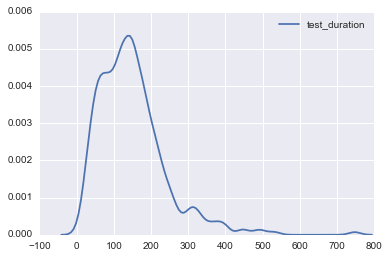

In [114]:
seaborn.kdeplot(tidy_data.test_duration)

In [115]:
filtered_data = tidy_data[
    (tidy_data.q0 < 5) &
    (tidy_data.test_duration > 30)
]

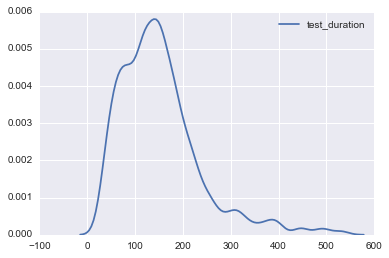

In [116]:
seaborn.kdeplot(filtered_data.test_duration)

In [117]:
filtered_data.describe()

,c_support,cn,cp,evaluation,q0,q1,q2,test_duration,v_score
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,14.419540,37.000000,63.000000,4.647959,0.353741,1.265306,7.051020,152.140197,4.714286
std,21.836833,26.100416,26.100416,3.173589,0.991991,2.895072,2.699813,85.984809,2.722257
min,-2.833500,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,31.600000,2.400000
25%,-1.596000,10.000000,40.000000,1.000000,0.000000,0.000000,5.000000,90.230000,2.400000
50%,6.708900,40.000000,60.000000,5.000000,0.000000,0.000000,8.000000,140.250000,3.300000
75%,27.573900,60.000000,90.000000,7.000000,0.000000,0.000000,10.000000,187.664000,8.500000
max,70.959500,90.000000,90.000000,10.000000,4.000000,10.000000,10.000000,531.514000,8.500000


/usr/local/lib/python3.5/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


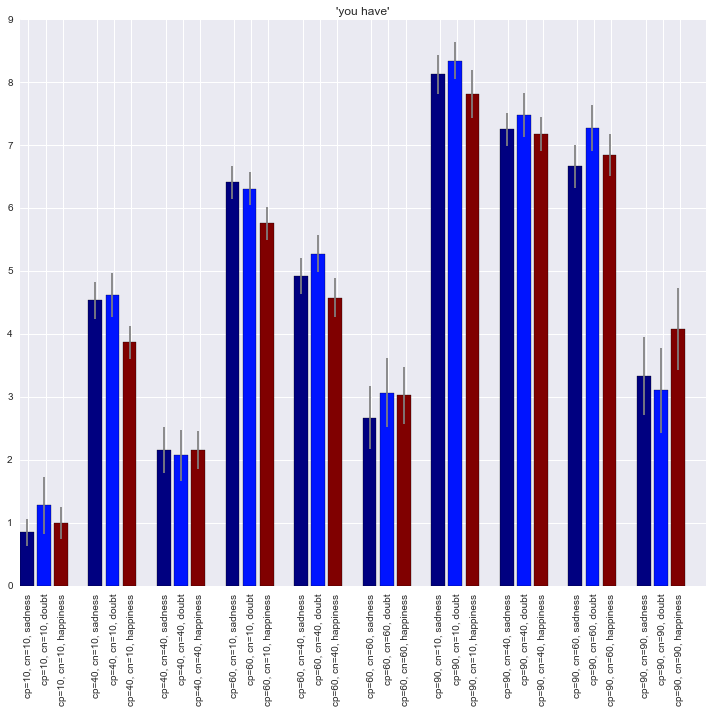

In [135]:
grouped = filtered_data[filtered_data.personal=="you have"].groupby(["cp", "cn", "v_score", "valence"])

fig, ax = plt.subplots(figsize=(10,10), tight_layout=True)

color_map_name = "jet"
color_map = plt.get_cmap(color_map_name)
color_indices = [name[2] for name,group in grouped]
norm = colors.Normalize(min(color_indices), max(color_indices))

mean = grouped.evaluation.mean()
ste = grouped.evaluation.std() / (grouped.evaluation.size())**.5
index = np.array([i + i//3 for i in range(len(mean))])
names = ["cp={0}, cn={1}, {3}".format(*name) for name,group in grouped]
bars = ax.bar(index,mean,yerr=ste,ecolor="gray")

for thisci, thisbar in zip(color_indices, bars):
    color = color_map(norm(thisci))
    thisbar.set_facecolor(color)

ax.set_xticks(index+.5)
ax.set_xticklabels(names, rotation="vertical")
ax.set_title("'you have'")
ax.set_xlim(0,40)
savefig("you-have-cond-means.pdf")

/usr/local/lib/python3.5/site-packages/matplotlib/figure.py:1718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


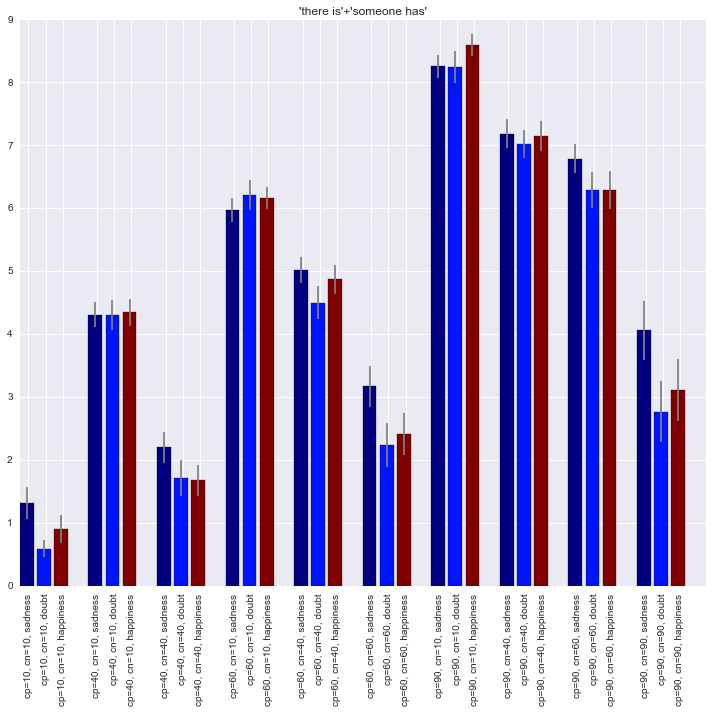

In [136]:
grouped = filtered_data[filtered_data.personal!="you have"].groupby(["cp", "cn", "v_score", "valence"])

fig, ax = plt.subplots(figsize=(10,10), tight_layout=True)

color_map_name = "jet"
color_map = plt.get_cmap(color_map_name)
color_indices = [name[2] for name,group in grouped]
norm = colors.Normalize(min(color_indices), max(color_indices))

mean = grouped.evaluation.mean()
ste = grouped.evaluation.std() / (grouped.evaluation.size())**.5
index = np.array([i + i//3 for i in range(len(mean))])
names = ["cp={0}, cn={1}, {3}".format(*name) for name,group in grouped]
bars = ax.bar(index,mean,yerr=ste,ecolor="gray")

for thisci, thisbar in zip(color_indices, bars):
    color = color_map(norm(thisci))
    thisbar.set_facecolor(color)

ax.set_xticks(index+.5)
ax.set_xticklabels(names, rotation="vertical")
ax.set_title("'there is'+'someone has'")
ax.set_xlim(0,40)
savefig("there+someone-cond-means.pdf")